## Importing all the required Libraries
#### OpenCV- It is a library of programming functions mainly aimed at real-time computer vision. 
#### Matplotlib- It is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
#### Pandas- In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Reading images from folder

In [27]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2

mypath='C:/Users/FENNY/Desktop/SOS/Dataset/crowdai/c_0/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    
    images[n] = cv2.imread( join(mypath,onlyfiles[n]) )

In [8]:
images.shape # the folder contained 270 images

(270,)

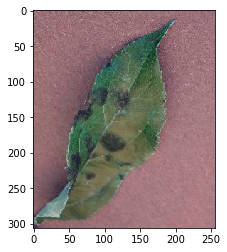

In [9]:
plt.imshow(images[5]) #Using matplotlib ploting image 

In [11]:
type(images) # images are of the form numpyarray

numpy.ndarray

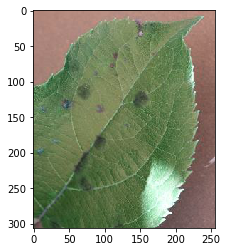

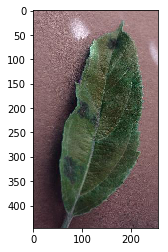

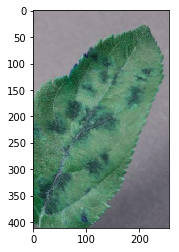

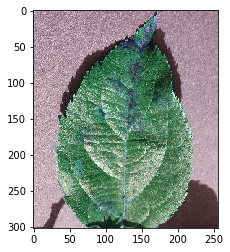

In [15]:
# Reading multiple images from folder
for i in range(0,4):    
    plt.imshow(images[i])
    plt.show()

### Averaging the pixel values 

#### Simple Average
This formula is very simple:

G = (R+G+B) / 3

In [17]:
def average(pixel): # Normal averaging of pixels of image
    return (pixel[0] + pixel[1] + pixel[2]) / 3

In [18]:
grey = np.zeros((images[0].shape[0], images[0].shape[1])) # init 2D numpy array
# get row number
for rownum in range(len(images[0])):
    for colnum in range(len(images[0][rownum])):
        grey[rownum][colnum] = average(images[0][rownum][colnum])

c:\users\fenny\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


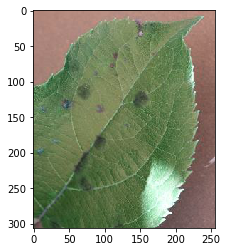

In [19]:
import matplotlib.pyplot as plt # import
plt.imshow(images[0]) #load
plt.show()  # show the window

#### Weighted Average
This method is more ‘human’ – because humans perceive some colors more than the rest, we apply a weighted average. [5][6]. Here’s the formula:

G = R*0.299 + G*0.587 + B*0.114

Green is the most prominent color (nearly 60%), followed by red(30%) and finally blue(11%). Here’s the equivalent code

In [40]:
def weightedAverage(pixel):# weighted averaging the pixels of images
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

In [41]:
grey = np.zeros((images[0].shape[0], images[0].shape[1])) # init 2D numpy array
# get row number
for rownum in range(len(images[0])):
    for colnum in range(len(images[0][rownum])):
        grey[rownum][colnum] = weightedAverage(images[0][rownum][colnum])

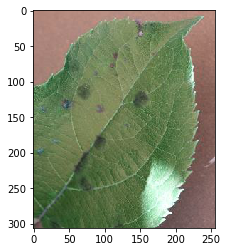

In [42]:
import matplotlib.pyplot as plt # import
plt.imshow(images[0]) #load
plt.show()  # show the window

#### Converting image of form RGB into Gray scale

An RGB Image consists of 3 layers R,G,B as it is clearly see through its name. It’s a 3 dimensional matrix, for example, 3 consecutive pages in your book. where grayscale image is of only 2 dimensions, and the values ranges between 0–255 (8-bit unsigned integers).

Therefore, some algorithms can only applied on 2-D image rather than 3-D, hence we convert an RGB image into a grayscale image, for instance, Black and White conversion of an image, convolution of an image, etc.

In [43]:
import matplotlib.cm as cm 

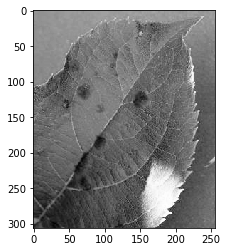

In [44]:
plt.imshow(grey, cmap =cm.Greys_r)
plt.show()

In [45]:
grey.shape

(306, 256)

#### Edge Detection
Edge detection is one of the fundamental operations when we perform image processing. It helps us reduce the amount of data (pixels) to process and maintains the structural aspect of the image. Two commonly used edge detection schemes - the gradient (Sobel - first order derivatives) based edge detector and the Laplacian (2nd order derivative, so it is extremely sensitive to noise) based edge detector. Both of them work with convolutions and achieve the same end goal - Edge Detection.

#### Sobel Edge Detection
Sobel edge detector is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes.

The operator uses two 3X3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical.

In [7]:
import cv2
import numpy as np

img = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)


cv2.imwrite('Original1.png', img)
cv2.imwrite('Sobel horizontal.png', sobel_horizontal)
cv2.imwrite('Sobel vertical.png', sobel_vertical)

cv2.waitKey(0)

-1

(Text(0.5,1,'Sobel Vertical'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

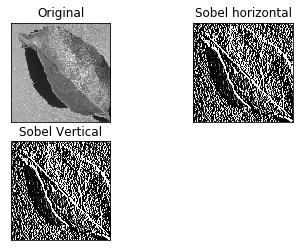

In [12]:
img=cv2.imread('Original.png')
img1=cv2.imread('Sobel horizontal.png')
img2=cv2.imread('Sobel horizontal.png')

plt.subplot(221),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img1)
plt.title('Sobel horizontal'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img2)
plt.title('Sobel Vertical'), plt.xticks([]), plt.yticks([])

#### Laplacian Edge Detection
Unlike the Sobel edge detector, the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass.

In [15]:
import cv2
import numpy as np

img = cv2.imread('he.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

laplacian = cv2.Laplacian(img, cv2.CV_64F)


cv2.imwrite('Originalfe.png', img)
cv2.imwrite('laplacian.png', laplacian)



cv2.waitKey(0)

-1

(Text(0.5,1,'laplacian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

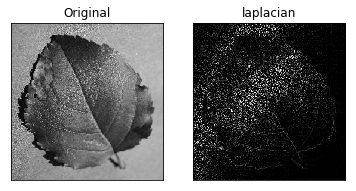

In [16]:
img=cv2.imread('Originalfe.png')
img1=cv2.imread('laplacian.png')
plt.subplot(121),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img1)
plt.title('laplacian'), plt.xticks([]), plt.yticks([])


#### Canny Edge Detection
OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient(G)=|Gx|+|Gy|. By default, it is False.

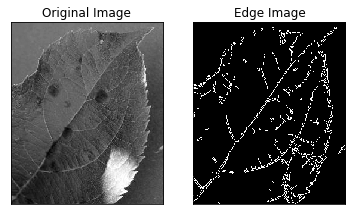

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('leaf.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
%matplotlib inline

#### Motion Blur
When we apply the motion blurring effect, it will look like you captured the picture while moving in a particular direction. 
We are reading the image as usual. We are then constructing a motion blur kernel. A motion blur kernel averages the pixel values in a particular direction. It's like a directional low pass filter.


(Text(0.5,1,'Motion Blur'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

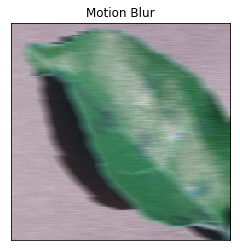

In [17]:
import cv2
import numpy as np

img = cv2.imread('sample.jpg')
size = 15

# generating the kernel
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

# applying the kernel to the input image
output = cv2.filter2D(img, -1, kernel_motion_blur)


plt.imshow(output)
plt.title('Motion Blur'), plt.xticks([]), plt.yticks([])

#### Erosion and dilation
Erosion and dilation are morphological image processing operations. Morphological image processing basically deals with modifying geometric structures in the image. These operations are primarily defined for binary images, but we can also use them on grayscale images. Erosion basically strips out the outermost layer of pixels in a structure, where as dilation adds an extra layer of pixels on a structure.

In [19]:
import cv2
import numpy as np

img = cv2.imread('he.jpg', 0)

kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)





cv2.imwrite('img_erosion.png',img_erosion )
cv2.imwrite('img_dilation.png',img_dilation)

cv2.waitKey(0)



-1

(Text(0.5,1,'Sobel Vertical'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

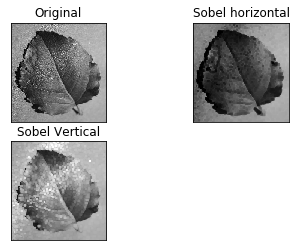

In [21]:
img=cv2.imread('Originalfe.png')
img1=cv2.imread('img_erosion.png')
img2=cv2.imread('img_dilation.png')

plt.subplot(221),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img1)
plt.title('Sobel horizontal'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img2)
plt.title('Sobel Vertical'), plt.xticks([]), plt.yticks([])

#### Harris Corner Detection
In computer vision, there is a popular corner detection technique called Harris Corner Detector. We basically construct a 2x2 matrix based on partial derivatives of the grayscale image, and then analyze the eigenvalues. This is actually an oversimplification of the actual algorithm,

(Text(0.5,1,'Harris Corner'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

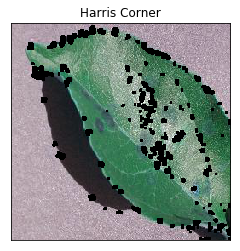

In [6]:
import cv2
import numpy as np

img = cv2.imread('sample.jpg')
cv2.imshow('original',img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

# for the polygon image
#dst = cv2.cornerHarris(gray,4,5,0.02)

# for the box image 
dst = cv2.cornerHarris(gray,4,5,0.04)       # limited corners
#dst = cv2.cornerHarris(gray,9,5,0.04)      # bottom right corner
#dst = cv2.cornerHarris(gray,14,5,0.04)     # top left corner

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,0]
plt.imshow(img)
plt.title('Harris Corner'), plt.xticks([]), plt.yticks([])






(Text(0.5,1,'Top 7 Features'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

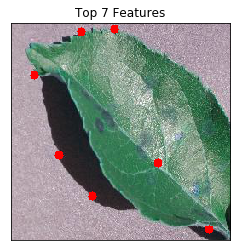

In [9]:
import cv2
import numpy as np

img = cv2.imread('sample.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 7, 0.05, 25)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    cv2.circle(img, (x,y), 5, 255, -1)

plt.imshow(img)
plt.title('Top 7 Features'), plt.xticks([]), plt.yticks([])



#### Scale Invariant Feature Transform (SIFT)
Even though corner features are "interesting", they are not good enough to characterize the truly interesting parts. When we talk about image content analysis, we want the image signature to be invariant to things such as scale, rotation, illumination, and so on. Humans are very good at these things.We want our image recognition systems to be able to do the same.


sift.detect() function finds the keypoint in the images.You can pass a mask if you want to search only a part of image. Each keypoint is a special structure which has many attributes like its (x,y) coordinates, size of the meaningful neighbourhood, angle which specifies its orientation, response that specifies strength of keypoints etc.

OpenCV also provides cv2.drawKeyPoints() function which draws the small circles on the locations of keypoints. If you pass a flag, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS to it, it will draw a circle with size of keypoint and it will even show its orientation.

(Text(0.5,1,'SIFT'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

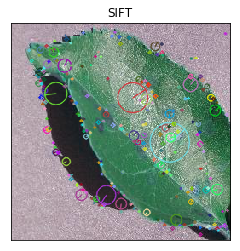

In [16]:
import cv2
import numpy as np

img = cv2.imread('sample.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift =cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)
plt.title("SIFT"), plt.xticks([]), plt.yticks([])

#cv2.imwrite('sift_keypoints.jpg',img)

#### Speeded up robust features(SURF)
In computer vision, speeded up robust features (SURF) is a patented local feature detector and descriptor. It can be used for tasks such as object recognition, image registration, classification or 3D reconstruction. It is partly inspired by the scale-invariant feature transform (SIFT) descriptor. The standard version of SURF is several times faster than SIFT and claimed by its authors to be more robust against different image transformations than SIFT.

(Text(0.5,1,'SURF'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

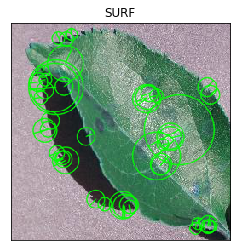

In [19]:
import cv2
import numpy as np

img1 = cv2.imread('sample.jpg')
gray= cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


surf = cv2.xfeatures2d.SURF_create()

# If we don't set this threshold, there will be too many keypoints
surf.setHessianThreshold(1500)

kp, des = surf.detectAndCompute(gray, None)

img = cv2.drawKeypoints(img1, kp, None, (0,255,0), 4)

plt.imshow(img)
plt.title("SURF"), plt.xticks([]), plt.yticks([])


#### Image segmentation
Image segmentation is the process of separating an image into its constituent parts. It is an important step in many computer vision applications in the real world. There are many different ways of segmenting an image. When we segment an image, we separate the regions based on various metrics such as color, texture, location, and so on. All the pixels within each region have something in common, depending on the metric we are using. 

#### Watershed Algorithm
Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys. You start filling every isolated valleys (local minima) with different colored water (labels). As the water rises, depending on the peaks (gradients) nearby, water from different valleys, obviously with different colors will start to merge. To avoid that, you build barriers in the locations where water merges. You continue the work of filling water and building barriers until all the peaks are under water. Then the barriers you created gives you the segmentation result. This is the “philosophy” behind the watershed. 

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('sample.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

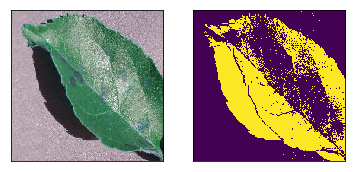

In [17]:
plt.subplot(121),plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh)
plt.xticks([]), plt.yticks([])

#### Masking the pixels
All the green pixels are masked and remaining part is segmented.

In [31]:
import cv2, numpy

# we just use an empty image for the purpose of this MCVE
img = cv2.imread("leaf.jpg")   
width = len(img[0])
height = len(img)

empty_img = numpy.zeros((height, width, 3), numpy.uint8)

i = 0
r = 0
c = 0

for line in img:
    c = 0

    for pixel in line:
        blue = pixel[0]
        green = pixel[1]
        red = pixel[2]

        if green != max(red, green, blue) or green <90:
            # this has a greenishy hue
            empty_img.itemset((r, c, 0), 255)

        c += 1
    r += 1

(Text(0.5,1,'Segment'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

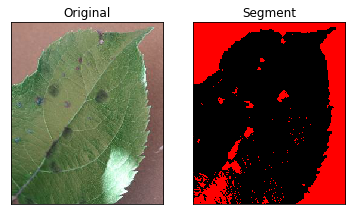

In [32]:

plt.subplot(121),plt.imshow(img)
plt.title("Original"),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(empty_img)
plt.title("Segment"),plt.xticks([]), plt.yticks([])


#### Simple Thresholding
Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function.


#### Otsu’s Binarization
cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.

In [35]:
import cv2 as cv
img = cv.imread('sample.jpg',0)
blur = cv.GaussianBlur(img,(5,5),0)
# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )

123 122.0


c:\users\fenny\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
c:\users\fenny\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
c:\users\fenny\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


(Text(0.5,1,'Segment'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

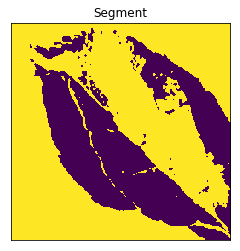

In [36]:
plt.imshow(otsu)
plt.title("Segment"),plt.xticks([]), plt.yticks([])

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('he.jpg',0)
# global thresholding
ret1,th1 = cv.threshold(img,90,255,cv.THRESH_BINARY)
# Otsu's thresholding


(Text(0.5,1,'Otsu Thresholding'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

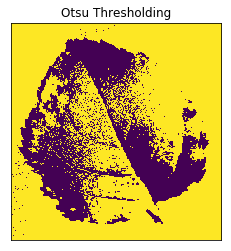

In [8]:
plt.imshow(th1)
plt.title("Otsu Thresholding"),plt.xticks([]), plt.yticks([])

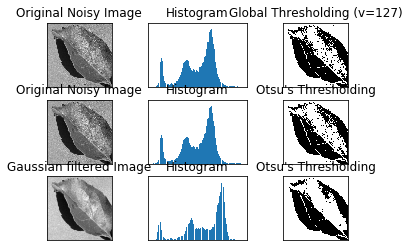

In [13]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('sample.jpg',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

#### Image Histogram
"An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image. It plots the number of pixels for each tonal value. By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance." - Image histogram.

#### Gray scale histogram

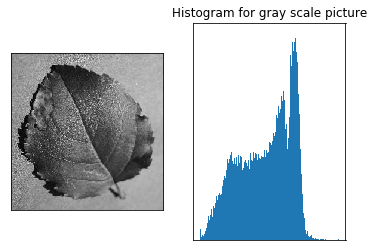

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

gray_img = cv2.imread('Originalfe.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite("grayhe.png",gray_img)
img=cv2.imread("grayhe.png")


hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])
plt.subplot(121),plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.hist(gray_img.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture'), plt.xticks([]), plt.yticks([])
plt.show()



#### RGB Scale Histogram

c:\users\fenny\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


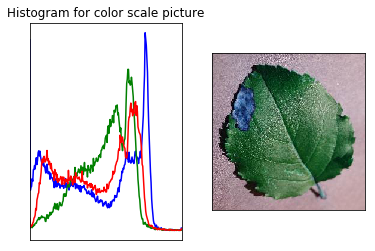

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('he.jpg', -1)


color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.subplot(121),plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.show()



6118.0 141


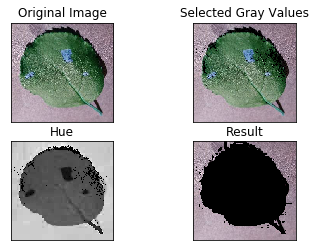

In [57]:

import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('fe.jpg')

#get rid of very bright and very dark regions
delta=10
lower_gray = np.array([delta, delta,delta])
upper_gray = np.array([255-delta,255-delta,255-delta])
# Threshold the image to get only selected
mask = cv2.inRange(img, lower_gray, upper_gray)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

#Convert to HSV space
HSV_img = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
hue = HSV_img[:, :, 0]

#select maximum value of H component from histogram
hist = cv2.calcHist([hue],[0],None,[256],[0,256])
hist= hist[1:, :] #suppress black value
elem = np.argmax(hist)
print (np.max(hist), np.argmax(hist))

tolerance=10
lower_gray = np.array([elem-tolerance, 0,0])
upper_gray = np.array([elem+tolerance,255,255])
# Threshold the image to get only selected
mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
# Bitwise-AND mask and original image
res2 = cv2.bitwise_and(img,img, mask= mask)


titles = ['Original Image', 'Selected Gray Values', 'Hue', 'Result']
images = [img, res, hue, res2]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### K-means Clustering
#### Color Quantization
Color Quantization is the process of reducing number of colors in an image. One reason to do so is to reduce the memory. Sometimes, some devices may have limitation such that it can produce only limited number of colors. In those cases also, color quantization is performed. Here we use k-means clustering for color quantization.

There are 3 features, say, R,G,B. So we need to reshape the image to an array of Mx3 size (M is number of pixels in image). And after the clustering, we apply centroid values (it is also R,G,B) to all pixels, such that resulting image will have specified number of colors. And again we need to reshape it back to the shape of original image.

(Text(0.5,1,'Segment'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

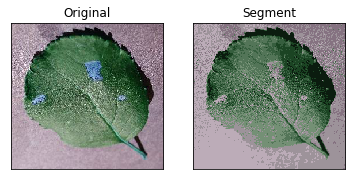

In [22]:
import numpy as np
import cv2

img = cv2.imread('fe.jpg')


Z = img.reshape((-1,3))


# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.subplot(121),plt.imshow(img)
plt.title("Original"),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res2)
plt.title("Segment"),plt.xticks([]), plt.yticks([])


(Text(0.5,1,'Segment'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

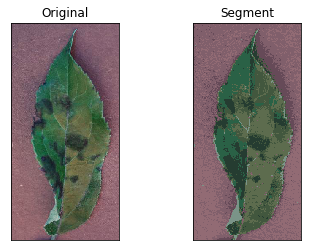

In [49]:
import numpy as np
import cv2

img = cv2.imread('fe1.jpg')


Z = img.reshape((-1,3))


# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.subplot(121),plt.imshow(img)
plt.title("Original"),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(res2)
plt.title("Segment"),plt.xticks([]), plt.yticks([])


Text(0.5,1,'Gray-scaled image')

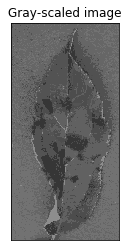

In [56]:
gray= cv2.cvtColor(res2, cv2.COLOR_BGR2GRAY)
cv2.imwrite("res2gray.png",gray)
img=cv2.imread("res2gray.png")
plt.imshow(img),plt.xticks([]), plt.yticks([])
plt.title("Gray-scaled image")


#### We are most likely to continue with K-means Clustering for segmenting image 
Advantages of using k-mean clustering

 1) If variables are huge, then  K-Means most of the times computationally faster than hierarchical clustering, if we keep k smalls.

2) K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are globular.